# Machine Learning for Single-Cell Biology
***

Winter Semester 2024/25<br />
Manfred Claassen, Matthias Bruhns, Jan Schleicher
<br />
***

## Assignment 1

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.multitest import multipletests
from functools import reduce

import os
from utils import import_mtx_expression_data
from typing import Tuple

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("ticks")

%matplotlib inline

In [2]:
DATA_PATH = "data/"
OUTPUT_PATH = "output/"
os.makedirs(OUTPUT_PATH, exist_ok=True)

### Task 1

In [3]:
# Load the data
expression_data_1 = import_mtx_expression_data(os.path.join(DATA_PATH, "expression_data_1.mtx"),
                                               os.path.join(DATA_PATH, "expression_data_1_barcodes.tsv"),
                                               os.path.join(DATA_PATH, "expression_data_1_genes.tsv"))
metadata_1 = pd.read_csv(os.path.join(DATA_PATH, "expression_data_1_metadata.tsv"), sep="\t", index_col=0)
metadata_1.columns = ["CellType", "Organ"]

We identified the organ of origin and the cell types by using cell type proportions in each organ. For this, we replicated the figure 2J from the paper, and visually matched the cell type proportions.

In [4]:
def task1a_identification(expression_data: pd.DataFrame, metadata: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Analyze the data to identify cell types and organs
    :param expression_data: expression matrix of shape (n_cells, n_genes)
    :param metadata: metadata containing cell groupings and sample IDs
    :return: organ and cell type identities
    """
    organ_identity = {"A": "spleen", "B": "LN", "C": "BM", "D": "blood", "E": "liver", "F": "lung"}
    cell_type_identity = {"T1": "E", "T2": "Exh", "T3": "I", "T4": "M", "T5": "P"}

    return pd.DataFrame.from_dict(organ_identity, orient="index"), \
        pd.DataFrame.from_dict(cell_type_identity, orient="index")

In [5]:
def cell_type_frequency(metadata):
    """
    Calculate the frequency of all cell types in each organ.
    :param metadata: annotation data containing CellType and Organ annotations.
    :return: frequency of all cell types in each organ as a DataFrame
    """
    frequency = []
    for organ in metadata.Organ.unique():
        cells = (metadata[metadata.Organ == organ]).groupby("CellType").count()
        cellCounts = cells.Organ.tolist()
        cellFrequencies = np.array(cellCounts) / sum(cellCounts)

        frequency.append(pd.DataFrame({
            "CellType": cells.index,
            organ: cellFrequencies
        }))

    frequency = reduce(lambda left, right: pd.merge(left, right, on = "CellType"), frequency)

    frequency = frequency.T
    frequency.columns = frequency.iloc[0, :].tolist()
    frequency = frequency.iloc[1:, :]

    frequency["Organ"] = frequency.index

    return frequency

In [6]:
# Identified organ and cell identities
organ_identity, cell_type_identity = task1a_identification(expression_data_1, metadata_1)
organ_identity = organ_identity.to_dict().get(0)
cell_type_identity = cell_type_identity.to_dict().get(0)

In [7]:
# Count the frequency of all cell types in each organ
frequency = cell_type_frequency(metadata_1)

# Set the correct order of the cell types
frequency = frequency[["Organ", "T5", "T4", "T3", "T2", "T1"]]

# Add identified organ and cell type annotations to the data
frequency.index = [f"{organ}: {organ_identity.get(organ)}" for organ in frequency.index]
frequency.columns = ["Organ"] + [f"{cellType}: {cell_type_identity.get(cellType)}" for cellType in frequency.columns[1:]]

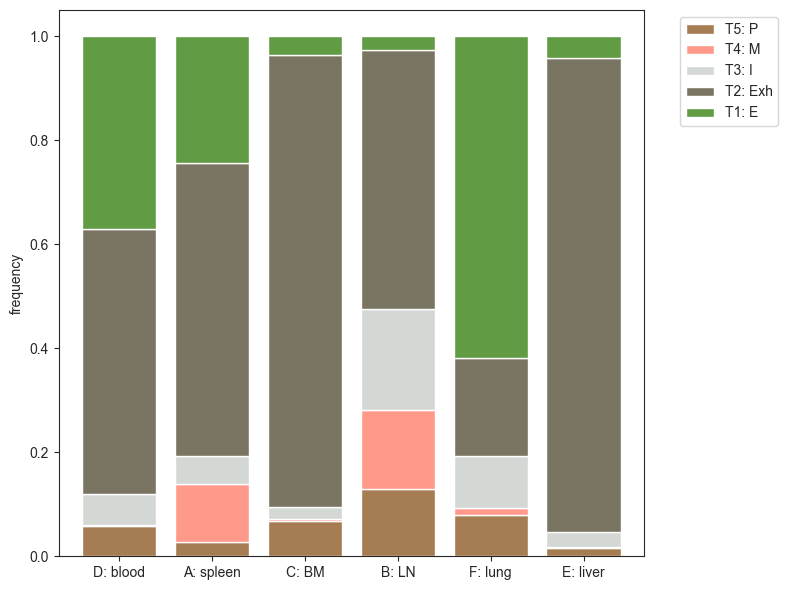

In [8]:
fig, ax = plt.subplots(figsize = (8, 6))
colors = ["#a67c52", "#ff9a8b", "#d4d8d5", "#7a7563", "#619b44"]
frequency.set_index("Organ").plot(kind = "bar", stacked = True, color = colors, ax = ax, width = 0.8)
ax.set_ylabel("frequency")
ax.set_xlabel("")
ax.set_xticklabels(frequency.index, rotation = 0)
ax.legend(title = "", bbox_to_anchor = (1.05, 1), loc = "upper left", labels = frequency.columns[1:])
plt.tight_layout()
plt.show()

In [9]:
task1a_organ_identity, task1a_cell_type_identity = task1a_identification(expression_data_1, metadata_1)

task1a_organ_identity.to_csv(os.path.join(OUTPUT_PATH, "task1a_organ_identity.txt"), sep="\t", header=False)
task1a_cell_type_identity.to_csv(os.path.join(OUTPUT_PATH, "task1a_cell_type_identity.txt"), sep="\t", header=False)

display(task1a_organ_identity)
display(task1a_cell_type_identity)

,0
A,spleen
B,LN
C,BM
D,blood
E,liver
F,lung


,0
T1,E
T2,Exh
T3,I
T4,M
T5,P


In [10]:
# Load the data
expression_data_2 = import_mtx_expression_data(os.path.join(DATA_PATH, "expression_data_2.mtx"),
                                               os.path.join(DATA_PATH, "expression_data_2_barcodes.tsv"),
                                               os.path.join(DATA_PATH, "expression_data_2_genes.tsv"))

In [11]:
def task1b_annotation(expression_data: pd.DataFrame, expression_data_ref: pd.DataFrame, metadata_ref) -> pd.DataFrame:
    """
    Annotate each cell with its corresponding cell type
    :param expression_data: expression matrix of shape (n_cells, n_genes)
    :param expression_data_ref: reference expression matrix of shape (n_cells_ref, n_genes)
    :param metadata_ref: reference metadata with n_cells_ref rows and a column containing true cell types for expression_data_ref
    :return: cell type annotations for expression_data
    """
    cell_annotations = pd.DataFrame(index=expression_data.index.values, columns=["phenotype"])

    #########################
    # INSERT YOUR CODE HERE #
    #########################

    return cell_annotations

**Please also submit the output CSV file with the annotations for Task 1b!**

In [12]:
task1b_cell_annotations = task1b_annotation(expression_data_2, expression_data_1, metadata_1)
task1b_cell_annotations.to_csv(os.path.join(OUTPUT_PATH, "task1b_cell_annotations.txt"), sep="\t")

### Task 2

In [13]:
cell_sequences = np.load(os.path.join(DATA_PATH, "tex_sampling.npy"))
metadata_3 = pd.read_csv(os.path.join(DATA_PATH, "expression_data_3_metadata.txt"), sep="\t", index_col=0)
expression_data_3 = import_mtx_expression_data(os.path.join(DATA_PATH, "expression_data_3.mtx"),
                                               os.path.join(DATA_PATH, "expression_data_3_barcodes.tsv"),
                                               os.path.join(DATA_PATH, "expression_data_3_genes.tsv"))

In [14]:
def task2a_trajectory_analysis(sequences: np.ndarray, metadata: pd.DataFrame) -> Tuple[list, list]:
    """
    Identify an ordering of louvain clusters along the two trajectories
    :param sequences: numpy array of cell sequences (cell indices, corresponding to rows of metadata) of shape
    (n_sequences, n_steps)
    :param metadata: cell metadata with louvain clusters
    :return: orderings of louvain clusters along the two trajectories
    """
    upper_trajectory_louvain_ordering = []
    lower_trajectory_louvain_ordering = []

    #########################
    # INSERT YOUR CODE HERE #
    #########################

    return upper_trajectory_louvain_ordering, lower_trajectory_louvain_ordering

**Please also submit the output files with the cluster orderings for Task 2a!**

In [15]:
task2a_upper_trajectory, task2a_lower_trajectory = task2a_trajectory_analysis(cell_sequences, metadata_3)
pd.DataFrame(task2a_upper_trajectory).to_csv(os.path.join(OUTPUT_PATH, "task2a_upper_trajectory.txt"), header=False)
pd.DataFrame(task2a_lower_trajectory).to_csv(os.path.join(OUTPUT_PATH, "task2a_lower_trajectory.txt"), header=False)

In [16]:
def task2b_correlation_analysis(expression_data: pd.DataFrame, metadata: pd.DataFrame) -> pd.DataFrame:
    """
    Compute the correlation of each gene's expression with sample ID
    :param expression_data: expression matrix of shape (n_cells, n_genes)
    :param metadata: metadata containing sample IDs (column name sampleID)
    :return: data frame with correlation and p value for each gene
    """
    gene_correlations = pd.DataFrame(data=np.ones((expression_data.shape[1], 3)), index=expression_data.columns.values,
                                     columns=["correlation", "abs_correlation", "p_value"])

    corrs = []
    pvals = []
    for gene in gene_correlations.index:
        expression = expression_data.loc[ metadata.index, gene ]
        correlation, p_value = stats.spearmanr(expression, metadata.sampleID)

        corrs.append(correlation)
        pvals.append(p_value)

    gene_correlations["correlation"] = corrs
    gene_correlations["abs_correlation"] = np.abs(corrs)
    gene_correlations["p_value"] = pvals

    return gene_correlations

**Please also submit the output CSV file with the correlations for Task 2b!**

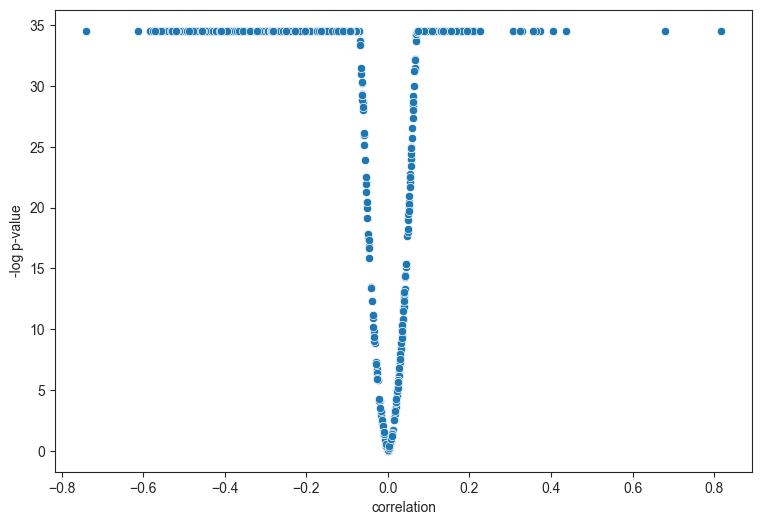

In [17]:
task2b_gene_correlations = task2b_correlation_analysis(expression_data_3, metadata_3)
task2b_gene_correlations.sort_values("abs_correlation", ascending=False).iloc[:10]\
    .to_csv(os.path.join(OUTPUT_PATH, "task2b_gene_correlations.txt"), sep="\t")

fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x=task2b_gene_correlations["correlation"], y=-np.log(task2b_gene_correlations["p_value"] + 1e-15), ax=ax)
ax.set_ylabel("-log p-value");